In [496]:
import nltk
from nltk.corpus import brown, stopwords
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from gensim.models import KeyedVectors
import os
from collections import Counter
from nltk.util import ngrams
import re
from sklearn.decomposition import PCA
import pickle
import pandas as pd
import string

In [497]:
punctuation = [p for p in string.punctuation]


In [498]:
stop = stopwords.words('english')

In [499]:

def get_bigrams(W):
    bigrams = ngrams(brown.words(), 2)
    bigrams_freq = Counter(bigrams)
    W_bigrams = np.zeros(shape=(len(W), len(W)))
    for i ,w1 in enumerate(W):
        for j, w2 in enumerate(W):
            W_bigrams[i, j] = bigrams_freq[(w1, w2)] + 1 #1-smoothing

    return W_bigrams



def get_lsa(M):
    pca = PCA(n_components=10)
    M2_10 = pca.fit_transform(M)

    pca = PCA(n_components=100)
    M2_100 = pca.fit_transform(M)


    pca = PCA(n_components=300)
    M2_300 = pca.fit_transform(M)

    return M2_10, M2_100, M2_300


def get_ppmi(M1):


    #ppmi = max (0, log (p (y | x ) / p(y))
    # p(y | x)
    row_sum = M1.sum(axis= 0)
    
    p_y_x = M1 / row_sum

    col_sum = M1.sum(axis = 1)
    p_y = col_sum / col_sum.sum()


    ppmi = np.maximum(0, np.log(p_y_x / p_y))
    return ppmi




# step 1: getting w2v embeddings

In [500]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [501]:
TABLE1 = ['brother', 'asylum', 'cord', 'signature', 'gem', 'bird', 'jewel', 'woodland', 'tumbler', 'graveyard', 'fruit', 'mound', 'wizard', 'pillow', 'rooster', 'automobile', 'magician', 'cushion', 'shore', 'stove', 'slave', 'cock', 'furnace', 'madhouse', 'car', 'midday', 'boy', 'cemetery', 'hill', 'oracle', 'coast', 'crane', 'autograph', 'food', 'voyage', 'serf', 'string', 'implement', 'forest', 'grin','land', 'sage', 'lad', 'glass', 'noon', 'monk', 'smile', 'tool', 'journey']

In [502]:
PAIRS = [('cord', 'smile', 0.02), ('rooster', 'voyage', 0.04), ('noon', 'string', 0.04), ('fruit', 'furnace' ,0.05) , ('autograph', 'shore', 0.06),
         ('automobile', 'wizard', 0.11), ('mound', 'stove', 0.14), ('grin', 'implement', 0.18), ('asylum', 'fruit', 0.19), ('asylum', 'monk', 0.39),
         ('graveyard', 'madhouse', 0.42), ('glass','magician', 0.44), ('boy', 'rooster', 0.44), ('cushion', 'jewel' , 0.45), ('monk', 'slave', 0.57),
         ('asylum', 'cemetery', 0.79), ('coast', 'forest', 0.85), ('grin', 'land', 0.88), ('shore', 'woodland', 0.9), ('monk', 'oracle', 0.91), ('boy', 'sage', .96),
         ('automobile', 'cushion', 0.97), ('mound', 'shore', 0.97), ('lad', 'wizard', 0.99), ('forest', 'graveyard', 1), ('food', 'rooster', 1.09), ('cemetery', 'woodland', 1.24),
         ('coast', 'hill', 1.26), ('furnace', 'implement',1.37), ('crane', 'rooster', 1.41), ('hill', 'woodland', 1.48), ('car', 'journey', 1.55), ('cemetery', 'mound', 1.69),
         ('glass', 'jewel', 1.78), ('magician', 'oracle', 1.82), ('crane', 'implement', 2.37), ('brother', 'lad', 2.41), ('sage', 'wizard', 2.46),
         ('oracle', 'sage', 2.61), ('bird', 'crane', 2.63), ('food', 'fruit', 2.69), ('brother', 'monk', 2.74), ('asylum','madhouse', 3.04), ('furnace', 'stove', 3.11), ('magician', 'wizard', 3.21),
         ('hill', 'mound', 3.29), ('cord', 'string', 3.41), ('glass', 'tumbler', 3.45), ('grin', 'smile', 3.46), ('serf', 'slave', 3.46), ('journey', 'voyage', 3.58), ('autograph', 'signature', 3.59),
         ('coast', 'shore', 3.6), ('forest', 'woodland', 3.65), ('implement', 'tool',3.66), ('cock', 'rooster', 3.68), ('boy', 'lad', 3.82), ('cushion','pillow', 3.84),
         ('cemetery', 'graveyard', 3.88), ('automobile', 'car', 3.92), ('midday', 'noon', 3.94), ('gem', 'jewel', 3.94)]




In [520]:
def in_brown_corpus(corpus, w):
    return w in corpus

def get_brown_frequencies(n = 5000):
    freq_dict = nltk.FreqDist(w for w in brown.words())
    freq_words = freq_dict.most_common(n)
    w = [item[0] for item in freq_words if item[0] not in punctuation and item[0] not in stop]
    least_common_words = w[-5:]
    
    return w, least_common_words

# step 2: Table 1 embeddings

In [521]:
W, least_common_words = get_brown_frequencies()


In [522]:
table1_words = [w for w in TABLE1]

In [523]:
table1_embeddings = [model[w] for w in table1_words]

# step 3: similarities

In [513]:
def get_similarity(M, W, pairs):
    '''
    M: embeddings
    W: words
    '''
    similarities = []
    x = []
    y = []
    for pair in pairs:
        
        index1 = W.index(pair[0])
        index2 = W.index(pair[1])
        similarity = cosine_similarity([M[index1]], [M[index2]])[0][0]
        similarities.append((pair[0], pair[1], similarity))
        x.append(similarity)
        y.append(pair[2])
        

    return similarities, stats.pearsonr(x , y)

In [514]:
w2v_similarities, corrs = get_similarity(table1_embeddings, table1_words, PAIRS)

In [54]:
w2v_similarities

[('cord', 'smile', 0.01811644),
 ('rooster', 'voyage', 0.062758096),
 ('noon', 'string', 0.021654531),
 ('fruit', 'furnace', 0.073214985),
 ('autograph', 'shore', 0.034655914),
 ('automobile', 'wizard', -0.028087419),
 ('mound', 'stove', 0.24527247),
 ('grin', 'implement', -0.00023054832),
 ('asylum', 'fruit', 0.057809643),
 ('asylum', 'monk', 0.13866825),
 ('graveyard', 'madhouse', 0.29396817),
 ('glass', 'magician', 0.03722491),
 ('boy', 'rooster', 0.28485194),
 ('cushion', 'jewel', 0.12478441),
 ('monk', 'slave', 0.1914623),
 ('asylum', 'cemetery', 0.092435226),
 ('coast', 'forest', 0.23609792),
 ('grin', 'land', 0.039560895),
 ('shore', 'woodland', 0.116909474),
 ('monk', 'oracle', 0.3035404),
 ('boy', 'sage', 0.16595694),
 ('automobile', 'cushion', 0.13358584),
 ('mound', 'shore', 0.13164131),
 ('lad', 'wizard', 0.33023012),
 ('forest', 'graveyard', 0.22901121),
 ('food', 'rooster', 0.11830647),
 ('cemetery', 'woodland', 0.3819251),
 ('coast', 'hill', 0.16115779),
 ('furnace', 'im

In [509]:
#similarities correlation

In [515]:
corrs

(0.7792035251981977, 8.740041750528375e-14)

# Step 4: analogy test

In [524]:
analogy_data = {}
topic = ''
with open('analogy.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith(':'):
            topic = line.replace('\n', '').replace(':', '')
            analogy_data[topic] = []
        else:
            line = re.sub(r'(\n|\t)', '', line)
            items = line.split(' ')
            
            analogy_data[topic].append(items)
        
        

In [525]:
analogy_data

{' capital-common-countries': [['Athens', 'Greece', 'Baghdad', 'Iraq'],
  ['Athens', 'Greece', 'Bangkok', 'Thailand'],
  ['Athens', 'Greece', 'Beijing', 'China'],
  ['Athens', 'Greece', 'Berlin', 'Germany'],
  ['Athens', 'Greece', 'Bern', 'Switzerland'],
  ['Athens', 'Greece', 'Cairo', 'Egypt'],
  ['Athens', 'Greece', 'Canberra', 'Australia'],
  ['Athens', 'Greece', 'Hanoi', 'Vietnam'],
  ['Athens', 'Greece', 'Havana', 'Cuba'],
  ['Athens', 'Greece', 'Helsinki', 'Finland'],
  ['Athens', 'Greece', 'Islamabad', 'Pakistan'],
  ['Athens', 'Greece', 'Kabul', 'Afghanistan'],
  ['Athens', 'Greece', 'London', 'England'],
  ['Athens', 'Greece', 'Madrid', 'Spain'],
  ['Athens', 'Greece', 'Moscow', 'Russia'],
  ['Athens', 'Greece', 'Oslo', 'Norway'],
  ['Athens', 'Greece', 'Ottawa', 'Canada'],
  ['Athens', 'Greece', 'Paris', 'France'],
  ['Athens', 'Greece', 'Rome', 'Italy'],
  ['Athens', 'Greece', 'Stockholm', 'Sweden'],
  ['Athens', 'Greece', 'Tehran', 'Iran'],
  ['Athens', 'Greece', 'Tokyo', '

In [526]:
# getting the LSA vectors
#removing stop words and punctuation for LSA embeddings
new_words = [w for w in TABLE1 if not in_brown_corpus(W, w)]
W = W + new_words
n = len(W)
n

4880

In [527]:
#removing words from W that aren't in w2v embeddings
W= [w for w in W if w in model]

In [528]:
M1 = get_bigrams(W)
M1_plus = get_ppmi(M1)
M2_10 , M2_100, M2_300 = get_lsa(M1_plus)

In [529]:
lsa_embeddings = {w:M2_300[i] for i , w in enumerate(W)}

In [530]:
#finding the smallest test set (LSA embeddings):
test_set = {}
for topic in analogy_data.keys():
    test_set[topic] = [] 
    for item in analogy_data[topic]:
        existing = [w for w in item if w in W]
        if len(existing) == len(item):
            test_set[topic].append(item)
            

In [563]:
def get_most_similar_word(vector, embeddings,W, w1, w2, w3, use_w = True):
    if use_w:
        similarities = {w: cosine_similarity([embeddings[w]], [vector])[0][0] for w in W}
        most_similars = sorted(similarities, key = lambda x:-similarities[x])
    else:
        most_similars = embeddings.most_similar(np.array([vector]))
        most_similars = [v[0] for v in most_similars]
    
    most_similar = most_similars[0]
    if w1 in most_similars:
        most_similars.remove(w1)
    if w2 in most_similars:
        most_similars.remove(w2)
    if w3 in most_similars:
        most_similars.remove(w3)
    most_similar_after_removal = most_similars[0]
    return most_similar, most_similar_after_removal
    
def perform_analogy_test(W, analogy_data, embeddings, use_w = True):
    similarity_retrieval = {}
    topic_accuracies = {}
    for topic in analogy_data.keys():
        similarity_retrieval[topic] = []
        topic_correct = 0
        for item in analogy_data[topic]:
            
            
            v = embeddings[item[1]] - embeddings[item[0]] + embeddings[item[2]]
            
        
            most_similar1, most_similar2 = get_most_similar_word(v, embeddings,W, item[0], item[1], item[2], use_w) 
            similarity_retrieval[topic].append((item[0], item[1], item[2], most_similar1, most_similar2))
            if most_similar2 == item[3]:
                topic_correct += 1
            topic_accuracies[topic] = topic_correct / len(analogy_data[topic])
    return similarity_retrieval, topic_accuracies
        
            

                
                
    

In [564]:
#word2vec
similarity_retrieval_w2v, topic_accuracies_w2v = perform_analogy_test(W, test_set, model)

In [565]:
similarity_retrieval_w2v

{' capital-common-countries': [('Berlin',
   'Germany',
   'London',
   'London',
   'Britain'),
  ('Berlin', 'Germany', 'Moscow', 'Russia', 'Russia'),
  ('Berlin', 'Germany', 'Paris', 'France', 'France'),
  ('Berlin', 'Germany', 'Rome', 'Italy', 'Italy'),
  ('London', 'England', 'Moscow', 'Russia', 'Russia'),
  ('London', 'England', 'Paris', 'France', 'France'),
  ('London', 'England', 'Rome', 'Rome', 'Italy'),
  ('London', 'England', 'Berlin', 'England', 'Germany'),
  ('Moscow', 'Russia', 'Paris', 'France', 'France'),
  ('Moscow', 'Russia', 'Rome', 'Rome', 'Italy'),
  ('Moscow', 'Russia', 'Berlin', 'Germany', 'Germany'),
  ('Moscow', 'Russia', 'London', 'London', 'Britain'),
  ('Paris', 'France', 'Rome', 'Italy', 'Italy'),
  ('Paris', 'France', 'Berlin', 'Germany', 'Germany'),
  ('Paris', 'France', 'London', 'Britain', 'Britain'),
  ('Paris', 'France', 'Moscow', 'Russia', 'Russia'),
  ('Rome', 'Italy', 'Berlin', 'Germany', 'Germany'),
  ('Rome', 'Italy', 'London', 'London', 'Britain'

In [566]:
topic_accuracies_w2v

{' capital-common-countries': 0.8,
 ' capital-world': 1.0,
 ' city-in-state': 1.0,
 ' family': 0.9,
 ' gram1-adjective-to-adverb': 0.45,
 ' gram2-opposite': 0.35,
 ' gram3-comparative': 0.861904761904762,
 ' gram4-superlative': 0.9,
 ' gram5-present-participle': 0.8088235294117647,
 ' gram6-nationality-adjective': 0.9056603773584906,
 ' gram7-past-tense': 0.7583333333333333,
 ' gram8-plural': 0.8921568627450981,
 ' gram9-plural-verbs': 0.8409090909090909}

In [567]:
#word2vec
similarity_retrieval_w2v_2, topic_accuracies_w2v_2 = perform_analogy_test(W, test_set, model, False)

In [568]:
similarity_retrieval_w2v_2

{' capital-common-countries': [('Berlin', 'Germany', 'London', 'UK', 'UK'),
  ('Berlin', 'Germany', 'Moscow', 'Russia', 'Russia'),
  ('Berlin', 'Germany', 'Paris', 'France', 'France'),
  ('Berlin', 'Germany', 'Rome', 'Italy', 'Italy'),
  ('London', 'England', 'Moscow', 'Russia', 'Russia'),
  ('London', 'England', 'Paris', 'France', 'France'),
  ('London', 'England', 'Rome', 'Rome', 'Italy'),
  ('London', 'England', 'Berlin', 'England', 'Germany'),
  ('Moscow', 'Russia', 'Paris', 'France', 'France'),
  ('Moscow', 'Russia', 'Rome', 'Rome', 'Italy'),
  ('Moscow', 'Russia', 'Berlin', 'Germany', 'Germany'),
  ('Moscow', 'Russia', 'London', 'London', 'Britain'),
  ('Paris', 'France', 'Rome', 'Italy', 'Italy'),
  ('Paris', 'France', 'Berlin', 'Germany', 'Germany'),
  ('Paris', 'France', 'London', 'Britain', 'Britain'),
  ('Paris', 'France', 'Moscow', 'Russia', 'Russia'),
  ('Rome', 'Italy', 'Berlin', 'Germany', 'Germany'),
  ('Rome', 'Italy', 'London', 'London', 'UK'),
  ('Rome', 'Italy', 'Mo

In [569]:
topic_accuracies_w2v_2

{' capital-common-countries': 0.8,
 ' capital-world': 1.0,
 ' city-in-state': 0.8648648648648649,
 ' family': 0.9,
 ' gram1-adjective-to-adverb': 0.36666666666666664,
 ' gram2-opposite': 0.05,
 ' gram3-comparative': 0.8333333333333334,
 ' gram4-superlative': 0.8666666666666667,
 ' gram5-present-participle': 0.8014705882352942,
 ' gram6-nationality-adjective': 0.8679245283018868,
 ' gram7-past-tense': 0.7466666666666667,
 ' gram8-plural': 0.8235294117647058,
 ' gram9-plural-verbs': 0.8106060606060606}

In [570]:
#LSA
similarity_retrieval_lsa, topic_accuracies_lsa = perform_analogy_test(W, test_set, lsa_embeddings)

In [571]:
similarity_retrieval_lsa

{' capital-common-countries': [('Berlin',
   'Germany',
   'London',
   'Germany',
   'fruit'),
  ('Berlin', 'Germany', 'Moscow', 'Moscow', 'appearance'),
  ('Berlin', 'Germany', 'Paris', 'Germany', 'fruit'),
  ('Berlin', 'Germany', 'Rome', 'Germany', 'fruit'),
  ('London', 'England', 'Moscow', 'Moscow', 'Hill'),
  ('London', 'England', 'Paris', 'England', 'hold'),
  ('London', 'England', 'Rome', 'England', 'installed'),
  ('London', 'England', 'Berlin', 'England', 'Cuba'),
  ('Moscow', 'Russia', 'Paris', 'Russia', 'context'),
  ('Moscow', 'Russia', 'Rome', 'Russia', 'discussions'),
  ('Moscow', 'Russia', 'Berlin', 'Berlin', 'University'),
  ('Moscow', 'Russia', 'London', 'Russia', 'context'),
  ('Paris', 'France', 'Rome', 'Rome', 'Instead'),
  ('Paris', 'France', 'Berlin', 'Berlin', 'emotion'),
  ('Paris', 'France', 'London', 'London', 'implement'),
  ('Paris', 'France', 'Moscow', 'Moscow', 'twice'),
  ('Rome', 'Italy', 'Berlin', 'Berlin', 'emotion'),
  ('Rome', 'Italy', 'London', 'Lo

In [572]:
topic_accuracies_lsa

{' capital-common-countries': 0.0,
 ' capital-world': 0.0,
 ' city-in-state': 0.0,
 ' family': 0.0,
 ' gram1-adjective-to-adverb': 0.0,
 ' gram2-opposite': 0.0,
 ' gram3-comparative': 0.09047619047619047,
 ' gram4-superlative': 0.1,
 ' gram5-present-participle': 0.051470588235294115,
 ' gram6-nationality-adjective': 0.0,
 ' gram7-past-tense': 0.018333333333333333,
 ' gram8-plural': 0.0032679738562091504,
 ' gram9-plural-verbs': 0.007575757575757576}

In [573]:
#how many choosing the words

In [574]:
for topic in similarity_retrieval_w2v_2.keys():
    if len(similarity_retrieval_w2v_2[topic]) == 0:
        continue
    topic_wrongs = 0
    for item in similarity_retrieval_w2v_2[topic]:
        if item[3] in item[0:3]:
            topic_wrongs += 1
    print(topic, topic_wrongs / len(similarity_retrieval_w2v_2[topic]))
            

 capital-common-countries 0.25
 capital-world 0.3333333333333333
 city-in-state 0.40540540540540543
 family 0.43333333333333335
 gram1-adjective-to-adverb 0.9666666666666667
 gram2-opposite 1.0
 gram3-comparative 0.6095238095238096
 gram4-superlative 0.5333333333333333
 gram5-present-participle 0.9117647058823529
 gram6-nationality-adjective 0.11320754716981132
 gram7-past-tense 0.8433333333333334
 gram8-plural 0.9281045751633987
 gram9-plural-verbs 0.803030303030303


In [575]:
for topic in similarity_retrieval_w2v.keys():
    if len(similarity_retrieval_w2v[topic]) == 0:
        continue
    topic_wrongs = 0
    for item in similarity_retrieval_w2v[topic]:
        if item[3] in item[0:3]:
            topic_wrongs += 1
    print(topic, topic_wrongs / len(similarity_retrieval_w2v[topic]))
            

 capital-common-countries 0.3
 capital-world 0.3333333333333333
 city-in-state 0.43243243243243246
 family 0.43333333333333335
 gram1-adjective-to-adverb 0.9666666666666667
 gram2-opposite 1.0
 gram3-comparative 0.6095238095238096
 gram4-superlative 0.5333333333333333
 gram5-present-participle 0.9117647058823529
 gram6-nationality-adjective 0.1320754716981132
 gram7-past-tense 0.8433333333333334
 gram8-plural 0.9281045751633987
 gram9-plural-verbs 0.803030303030303


In [576]:
for topic in similarity_retrieval_lsa.keys():
    if len(similarity_retrieval_lsa[topic]) == 0:
        continue
    topic_wrongs = 0
    for item in similarity_retrieval_lsa[topic]:
        if item[3] in item[0:3]:
            topic_wrongs += 1
    print(topic, topic_wrongs / len(similarity_retrieval_lsa[topic]))
            

 capital-common-countries 1.0
 capital-world 1.0
 city-in-state 1.0
 family 0.8333333333333334
 gram1-adjective-to-adverb 0.9916666666666667
 gram2-opposite 0.8
 gram3-comparative 0.9142857142857143
 gram4-superlative 1.0
 gram5-present-participle 0.8786764705882353
 gram6-nationality-adjective 1.0
 gram7-past-tense 0.995
 gram8-plural 0.954248366013072
 gram9-plural-verbs 0.8787878787878788


# Diachronic word embeddings

In [147]:
#step1

In [18]:
diachronic_embeddings = pickle.load(open('embeddings/data.pkl', 'rb'))

In [19]:
diachronic_embeddings.keys()

dict_keys(['w', 'd', 'E'])

In [155]:
diachronic_embeddings['d']

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

In [163]:
len(diachronic_embeddings['E'][0])

10

In [164]:
#step2

In [7]:
#words from paper Diachronic Word Embeddings Reveal Statistical Laws of Semantic Change and Statistically Significant Detection of Linguistic Change
words = {'gay', 'fatal' ,'awful', 'nice', 'broadcast', 'monitor', 'record', 'guy', 'call',
        'know', 'got', 'would', 'decided', 'think', 'stop', 'remember', 'started', 'must', 'wanted',
        'harry', 'headed', 'calls', 'gay', 'wherever', 'male', 'actually', 'special', 'cover', 'naturally',
        'wanting','check', 'starting', 'major', 'actually', 'touching',  'romance',
         'recording', 'tape' ,'checking', 'diet', 'sex' ,'bitch', 'plastic', 'transmitted' , 'peck', 'honey', 
         'hug', 'windows','bush', 'apple', 'sink' ,'click', 'handle'}

In [23]:
def get_cosine_disntace(v1, v2):
    cs = cosine_similarity([v1], [v2])[0][0]
    return 1 - cs

In [142]:
#Method 1
def get_word_semantic_change_from_single_point(w, word_diachronic_embeddings):
    
    start_point = word_diachronic_embeddings[0]
    start_index = 0
    time_series = []
    while (start_point == 0).all():
        start_point = word_diachronic_embeddings[start_index + 1]
        start_index += 1
        
    time_series += [get_cosine_disntace(v, start_point) for v in word_diachronic_embeddings]
    return time_series

In [12]:
#Method 2
def get_word_semantic_change_from_previous_point(w, word_diachronic_embeddings):
    start_point = word_diachronic_embeddings[0]
    time_series = [get_cosine_disntace(v, word_diachronic_embeddings[i - 1]) if i > 0 else 0 for i, v in enumerate(word_diachronic_embeddings)]
    return time_series

In [37]:
def get_knn(w, word_embeddings , all_embeddings, words, k = 10):
    distances = np.array([get_cosine_disntace(word_embeddings, v) for v in all_embeddings if not (v == word_embeddings).all()])
    neighbors = np.argsort(distances)[:k]
    neighbors_words = [words[index] for index in neighbors]
    return neighbors_words

In [42]:
#Method 3
def get_word_semantic_change_from_knn(w,word_diachronic_embeddings , diachronic_embeddings, words, k = 10):
    time_series = []
    previous_neighbors = []
    all_neighbors = []
    for t , word_embeddings in enumerate(word_diachronic_embeddings):
        all_embeddings = [diachronic_embeddings['E'][v][0] for v in range(len(words))]
        neighbors = get_knn(w, word_embeddings , all_embeddings, words, k)
        if t == 0:
            time_series.append(0)
            previous_neighbors = neighbors
        else:
            intersection = [x for x in neighbors if x in previous_neighbors]
            all_neighbors.append(neighbors)
            time_series.append(np.exp(-len(intersection)))
            previous_neighbors = neighbors
    return time_series, all_neighbors
    
    

In [592]:
#method 4
def get_first_pc_ts(): 
    embeddings = diachronic_embeddings['E']
    all_vectors = np.concatenate(embeddings)
    pca = PCA(n_components=1)
    pca.fit(all_vectors)
    new_values = {}
    for i, w_vectors in enumerate(embeddings):
        values = np.concatenate(pca.transform(w_vectors))
        new_values[diachronic_embeddings['w'][i]] = values
    return new_values 

In [143]:
#getting time series of the words
method1_ts = {}
method2_ts = {}
method3_ts = {}
for w in diachronic_embeddings['w']:
    word_index = diachronic_embeddings['w'].index(w)
    w_d_embeddings = diachronic_embeddings['E'][word_index]
    method1_ts[w] = get_word_semantic_change_from_single_point(w, w_d_embeddings)
    method2_ts[w] = get_word_semantic_change_from_previous_point(w, w_d_embeddings)
    method3_ts[w] = get_word_semantic_change_from_knn(w,w_d_embeddings , diachronic_embeddings, diachronic_embeddings['w'])

In [593]:
method4_ts= get_first_pc_ts()

In [28]:
import pickle

In [144]:
pickle.dump(method1_ts, open('method1_ts.pkl', 'wb'))

In [30]:
pickle.dump(method2_ts, open('method2_ts.pkl', 'wb'))

In [69]:
pickle.dump(method3_ts, open('method3_ts.pkl', 'wb'))

In [594]:
pickle.dump(method4_ts, open('method4_ts.pkl', 'wb'))

In [145]:
method1_ts

{'time': [0.0,
  0.31214305866948444,
  0.4128031082081659,
  0.46438247137989364,
  0.4316426278707768,
  0.45321352697933626,
  0.5220878826330598,
  0.4852976764355189,
  0.475016691398352,
  0.549711448769375],
 'man': [3.3306690738754696e-16,
  0.2940055112423591,
  0.27176732044500607,
  0.3549096192846507,
  0.3819896657502041,
  0.3877978009748819,
  0.43701271330203484,
  0.4064819516874073,
  0.47039911152853586,
  0.500058956360198],
 'years': [-2.220446049250313e-16,
  0.16977981538153764,
  0.18921047099661625,
  0.2146367076083231,
  0.2433991200369091,
  0.24730613363888476,
  0.2732438848899449,
  0.25574934721149967,
  0.3285066964179416,
  0.2907269356601363],
 'part': [1.1102230246251565e-16,
  0.23795581798801535,
  0.26353390557985956,
  0.3666593634708787,
  0.28821145045123897,
  0.34211065210227554,
  0.36349303597225746,
  0.3862993414633157,
  0.40372333566588703,
  0.42047582473496736],
 'way': [-6.661338147750939e-16,
  0.3514117287632855,
  0.32445467934752

In [578]:
method1_final_change = {w:x[-1] - x[0] for w, x in method1_ts.items()}

In [140]:
method2_ts = pickle.load(open('method2_ts.pkl', 'rb'))
method2_ts

{'time': [0,
  0.31214305866948444,
  0.3205812053756597,
  0.3523720485493146,
  0.3333269575621357,
  0.37701513254969266,
  0.38991382592539636,
  0.35640704288837244,
  0.31868190824684184,
  0.35110624505093235],
 'man': [0,
  0.2940055112423591,
  0.2567858052257339,
  0.2679947018300607,
  0.3281485024181937,
  0.2749988184484333,
  0.33310932511605285,
  0.3096311282925789,
  0.30951063623589614,
  0.28842058481101307],
 'years': [0,
  0.16977981538153764,
  0.20326372834257755,
  0.19003402935874747,
  0.19049368599574634,
  0.206589546163501,
  0.2127753546995993,
  0.18009849837864467,
  0.2089116273557241,
  0.2229880036297679],
 'part': [0,
  0.23795581798801535,
  0.22621781191461432,
  0.27895972316556517,
  0.2681374956784035,
  0.3464532229661169,
  0.3557105219126466,
  0.27616551862003424,
  0.2805316048382225,
  0.3187773634676101],
 'way': [0,
  0.3514117287632855,
  0.3280348387861697,
  0.31083256886775656,
  0.2731038779266357,
  0.2895512766520749,
  0.31764167

In [45]:
method3_ts

{'time': ([0,
   1.0,
   0.0009118819655545162,
   0.0009118819655545162,
   0.00033546262790251185,
   0.0009118819655545162,
   0.00012340980408667956,
   0.00033546262790251185,
   0.0009118819655545162,
   0.00033546262790251185],
  [['time',
    'days',
    'moment',
    'period',
    'weeks',
    'months',
    'year',
    'years',
    'hour',
    'hours'],
   ['time',
    'period',
    'months',
    'weeks',
    'days',
    'hours',
    'periods',
    'delay',
    'interval',
    'years'],
   ['time',
    'period',
    'interval',
    'days',
    'hours',
    'weeks',
    'hour',
    'minutes',
    'years',
    'moment'],
   ['time',
    'weeks',
    'months',
    'hours',
    'period',
    'days',
    'hour',
    'delay',
    'minutes',
    'years'],
   ['time',
    'period',
    'days',
    'moment',
    'periods',
    'hours',
    'weeks',
    'hour',
    'interval',
    'months'],
   ['time',
    'period',
    'interval',
    'moment',
    'days',
    'hours',
    'weeks',
  

words that have high correlation between time and semantic time series are considered most changing

In [73]:
from scipy import stats

In [72]:
decades = [i for i in range(len(diachronic_embeddings['d']))]

In [104]:
def get_correlation_with_time(words_ts, word, third_method = False):
    
    if third_method:
        ts = words_ts[word][0] 
        
        rho, p = stats.spearmanr(decades,ts)
    else:
        rho, p = stats.spearmanr(decades, words_ts[word])
    return (rho, p)

In [105]:
#measure 1 most changing words

In [116]:
def get_most_least_changing(time_series,  k = 20, third_method = False):
    words = time_series.keys()
    
    correlations = {w:get_correlation_with_time(time_series, w, third_method) for w in words}
    sorted_correlations = sorted(correlations.items(), key = lambda x : x[1][0])
    most_changing = sorted_correlations[-20:]
    least_changing = sorted_correlations[:20]
    
    return most_changing, least_changing,correlations


In [284]:
method1_most_changing, method1_least_changing, method1_corr = get_most_least_changing(method1_ts)

In [285]:
method1_most_changing

[('mirror', (0.9999999999999999, 6.646897422032013e-64)),
 ('admission', (0.9999999999999999, 6.646897422032013e-64)),
 ('host', (0.9999999999999999, 6.646897422032013e-64)),
 ('lawyer', (0.9999999999999999, 6.646897422032013e-64)),
 ('margin', (0.9999999999999999, 6.646897422032013e-64)),
 ('challenge', (0.9999999999999999, 6.646897422032013e-64)),
 ('remedy', (0.9999999999999999, 6.646897422032013e-64)),
 ('divisions', (0.9999999999999999, 6.646897422032013e-64)),
 ('trend', (0.9999999999999999, 6.646897422032013e-64)),
 ('channel', (0.9999999999999999, 6.646897422032013e-64)),
 ('projects', (0.9999999999999999, 6.646897422032013e-64)),
 ('transactions', (0.9999999999999999, 6.646897422032013e-64)),
 ('network', (0.9999999999999999, 6.646897422032013e-64)),
 ('pupil', (0.9999999999999999, 6.646897422032013e-64)),
 ('accord', (0.9999999999999999, 6.646897422032013e-64)),
 ('plot', (0.9999999999999999, 6.646897422032013e-64)),
 ('intervention', (0.9999999999999999, 6.646897422032013e-6

In [286]:
method1_least_changing

[('computer', (-0.21474009169894706, 0.5513247480759309)),
 ('techniques', (-0.012158110873601292, 0.9734080635074243)),
 ('ml', (0.0, 1.0)),
 ('skills', (0.012158110873601292, 0.9734080635074243)),
 ('shri', (0.06748974310538336, 0.8530368033430833)),
 ('evaluation', (0.2727272727272727, 0.44583834154275137)),
 ('mcgraw', (0.2727272727272727, 0.44583834154275137)),
 ('electrons', (0.35757575757575755, 0.3103760917056799)),
 ('therapy', (0.5636363636363636, 0.08972402831709125)),
 ('variables', (0.5878787878787878, 0.07387770688865801)),
 ('sociology', (0.5878787878787878, 0.07387770688865801)),
 ('input', (0.6121212121212121, 0.05997214247725524)),
 ('germans', (0.6242424242424242, 0.053717767217167395)),
 ('economics', (0.6727272727272726, 0.0330412225454377)),
 ('commodities', (0.6727272727272726, 0.0330412225454377)),
 ('procedures', (0.7212121212121211, 0.018573155089460208)),
 ('situations', (0.7333333333333332, 0.01580059625057158)),
 ('jobs', (0.7454545454545454, 0.013330146315

In [586]:
method1_final_change = {w: x[-1] for w, x in method1_ts.items()}

In [587]:
sorted(method1_final_change.items(), key = lambda x : x[1])[::-1][:20]

[('programs', 0.9908060408371938),
 ('objectives', 0.9777930257849913),
 ('computer', 0.9612410643483436),
 ('radio', 0.9052701147159458),
 ('sector', 0.9006836366602485),
 ('goals', 0.8451478071876329),
 ('approach', 0.8398605922816098),
 ('van', 0.8367483908002056),
 ('shri', 0.8244319851175983),
 ('media', 0.8125349168703303),
 ('impact', 0.8000341939038889),
 ('perspective', 0.7931199949661136),
 ('patterns', 0.7823269040416171),
 ('berkeley', 0.7779084933889082),
 ('shift', 0.776931638140915),
 ('film', 0.7759189348198611),
 ('assessment', 0.7681167960046127),
 ('stanford', 0.7674790427852327),
 ('challenge', 0.7664920570780259),
 ('therapy', 0.7608242054204954)]

In [590]:
sorted(method1_final_change.items(), key = lambda x : x[1])[:20]

[('april', 0.2352065949847365),
 ('june', 0.26117633777733973),
 ('november', 0.28257345338302986),
 ('february', 0.28636454155874513),
 ('years', 0.2907269356601363),
 ('october', 0.2971440393982768),
 ('increase', 0.30143007605515704),
 ('january', 0.30179555011777626),
 ('century', 0.30730617145950123),
 ('months', 0.30972055852261204),
 ('daughter', 0.311677059890762),
 ('december', 0.3137375799871208),
 ('god', 0.315084508297378),
 ('september', 0.3178690128195941),
 ('feet', 0.3186646029282467),
 ('week', 0.31992764436258925),
 ('evening', 0.32186251996765325),
 ('door', 0.3222822738775526),
 ('payment', 0.3227135807934537),
 ('miles', 0.3257129148141351)]

In [588]:
method1_ts['programs']

[-4.440892098500626e-16,
 0.7803853473044335,
 0.9311284879391639,
 0.8918691514857852,
 0.9531896180858107,
 0.9218494455565751,
 0.9453341499964985,
 0.9661543339558472,
 0.9616016585064621,
 0.9908060408371938]

In [589]:
method1_ts['mirror']

[2.220446049250313e-16,
 0.2609051856653255,
 0.3033703255050729,
 0.3357593326498902,
 0.39047782227862404,
 0.4139494330537028,
 0.4484776492457292,
 0.49090056009024496,
 0.5097787818937488,
 0.5814442955451323]

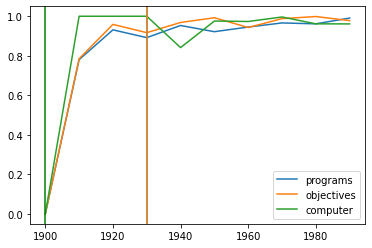

In [582]:
get_method_time_series(['programs', 'objectives', 'computer'], method1_ts)

In [287]:
method2_most_changing, method2_least_changing, method2_corr = get_most_least_changing(method2_ts)

In [288]:
method2_most_changing

[('storm', (0.9393939393939393, 5.484052998513666e-05)),
 ('tail', (0.9393939393939393, 5.484052998513666e-05)),
 ('treaty', (0.9515151515151514, 2.279854920641689e-05)),
 ('tube', (0.9515151515151514, 2.279854920641689e-05)),
 ('operations', (0.9515151515151514, 2.279854920641689e-05)),
 ('path', (0.9515151515151514, 2.279854920641689e-05)),
 ('journey', (0.9515151515151514, 2.279854920641689e-05)),
 ('boat', (0.9515151515151514, 2.279854920641689e-05)),
 ('grand', (0.9515151515151514, 2.279854920641689e-05)),
 ('formula', (0.9515151515151514, 2.279854920641689e-05)),
 ('enterprise', (0.9515151515151514, 2.279854920641689e-05)),
 ('sodium', (0.9515151515151514, 2.279854920641689e-05)),
 ('tea', (0.9515151515151514, 2.279854920641689e-05)),
 ('pressure', (0.9636363636363635, 7.320974809529922e-06)),
 ('citizen', (0.9636363636363635, 7.320974809529922e-06)),
 ('priest', (0.9636363636363635, 7.320974809529922e-06)),
 ('group', (0.9757575757575757, 1.4675461874042197e-06)),
 ('object', (0

In [289]:
method2_least_changing

[('sector', (-0.4424242424242424, 0.20042268671194224)),
 ('media', (-0.4424242424242424, 0.20042268671194224)),
 ('levels', (-0.43030303030303024, 0.21449233253280775)),
 ('technology', (-0.43030303030303024, 0.21449233253280775)),
 ('procedures', (-0.43030303030303024, 0.21449233253280775)),
 ('c', (-0.41818181818181815, 0.22911284098281892)),
 ('concern', (-0.41818181818181815, 0.22911284098281892)),
 ('impact', (-0.41818181818181815, 0.22911284098281892)),
 ('technique', (-0.41818181818181815, 0.22911284098281892)),
 ('goals', (-0.41818181818181815, 0.22911284098281892)),
 ('perspective', (-0.41818181818181815, 0.22911284098281892)),
 ('institutions', (-0.406060606060606, 0.24428229408662638)),
 ('agencies', (-0.406060606060606, 0.24428229408662638)),
 ('patterns', (-0.406060606060606, 0.24428229408662638)),
 ('census', (-0.406060606060606, 0.24428229408662638)),
 ('computer', (-0.39394240167285516, 0.25999379980543785)),
 ('anything', (-0.3939393939393939, 0.25999776683488757)),
 

In [290]:
method3_most_changing, method3_least_changing, method3_corr = get_most_least_changing(method3_ts, third_method = True)

In [291]:
method3_most_changing

[('divisions', (0.8087806670128277, 0.004611133387850723)),
 ('commissioners', (0.8174238913695991, 0.0038751540836284696)),
 ('certificate', (0.8227533512074423, 0.003465749500597922)),
 ('holland', (0.8254031273145536, 0.003274207485618082)),
 ('sins', (0.8263342440128466, 0.0032087448213575227)),
 ('haven', (0.830780403254297, 0.002909057238933892)),
 ('finance', (0.8334762598987157, 0.0027374777830697057)),
 ('stairs', (0.8362247231718761, 0.002570178493035792)),
 ('frontier', (0.8406253177443224, 0.00231784236455468)),
 ('accord', (0.8476852709410012, 0.0019510786246088345)),
 ('architecture', (0.848934830938402, 0.0018908357522871848)),
 ('boundary', (0.8511944217628685, 0.0017853315625475587)),
 ('petition', (0.8539182508743908, 0.0016638951381078518)),
 ('admission', (0.8670767080511405, 0.0011597682651924431)),
 ('assessment', (0.8719919340780657, 0.0010037040643941656)),
 ('chapel', (0.8788501706079498, 0.0008122539220057393)),
 ('federation', (0.8975491104081188, 0.000425229

In [292]:
method3_least_changing

[('plane', (-0.4259989772815657, 0.21962085072669255)),
 ('periods', (-0.41627756392782617, 0.23145969404827593)),
 ('issue', (-0.3877381965848981, 0.26824767928886323)),
 ('appearance', (-0.38645540811375023, 0.269971924470401)),
 ('assets', (-0.3826727192716692, 0.2750915222734676)),
 ('defeat', (-0.3826727192716692, 0.2750915222734676)),
 ('studies', (-0.38158362203593144, 0.27657525204499966)),
 ('diagnosis', (-0.36111406987678296, 0.3052639201005075)),
 ('destruction', (-0.35191219862390216, 0.3186517716049779)),
 ('account', (-0.3503245248726853, 0.32099214866588327)),
 ('families', (-0.3503245248726853, 0.32099214866588327)),
 ('enemy', (-0.3461585013559571, 0.3271756148334699)),
 ('evaluation', (-0.3446561747421316, 0.3294204634993368)),
 ('independence', (-0.34281389633643433, 0.33218410502853263)),
 ('employer', (-0.34210806619905754, 0.33324608868624955)),
 ('fish', (-0.33956440218095824, 0.33708771062507387)),
 ('departments', (-0.3387594564044284, 0.3383081019070614)),
 ('

In [613]:
list(method4_ts.items())[0][1][-1] - list(method4_ts.items())[0][1][0]

0.02340476667405738

In [625]:
method4_changes = sorted(method4_ts.items(), key = lambda x : abs(x[1][-1] - x[1][0]))
method4_most_changing = method4_changes[::-1][:20]
method4_least_changing = method4_changes[:20]

In [628]:
[(x[0], abs(x[1][-1] - x[1][0])) for x in method4_most_changing]

[('radio', 0.36847668129856104),
 ('techniques', 0.35675958043785977),
 ('model', 0.3369790818696289),
 ('approach', 0.3055671459012615),
 ('signal', 0.26025453123422243),
 ('center', 0.25539703670359226),
 ('agencies', 0.25468139871216644),
 ('film', 0.2544201851854771),
 ('programs', 0.2521839666142303),
 ('minute', 0.2487398410230931),
 ('computer', 0.23999865654633096),
 ('models', 0.23316251872170185),
 ('illness', 0.22834146739468478),
 ('agency', 0.22362462893314458),
 ('centre', 0.22312510621796244),
 ('pattern', 0.22078374182606667),
 ('harmony', 0.21718936209402995),
 ('electricity', 0.2156807006159256),
 ('labour', 0.2149913408467793),
 ('mystery', 0.20607512125186683)]

In [629]:
[(x[0], abs(x[1][-1] - x[1][0]) )for x in method4_least_changing]

[('exports', 7.96244599378243e-05),
 ('title', 8.006493736929798e-05),
 ('nobody', 0.00012338492913405164),
 ('everyone', 0.00024814525905215296),
 ('hopes', 0.0002764228836744653),
 ('stanford', 0.0003375837088100131),
 ('teachers', 0.00035408797463888295),
 ('claim', 0.0005225300869119501),
 ('authors', 0.0005295567190628826),
 ('length', 0.0005357532785686403),
 ('remark', 0.0005740324764107255),
 ('securities', 0.0005949493379378903),
 ('growth', 0.0006063717719843043),
 ('proposition', 0.0006849210463022587),
 ('massachusetts', 0.0007562227952489509),
 ('degrees', 0.000764801784561453),
 ('way', 0.0007867437572527808),
 ('chamber', 0.0009172924703117757),
 ('prospect', 0.0009623404310821343),
 ('dispute', 0.0010345865820567124)]

In [639]:
#intercorrelation
def get_intercorrelation(method1, method2, method3, method4):
    x = []
    y = []
    z = []
    t = []
    for i ,w in enumerate(diachronic_embeddings['w']):
        
        x.append(method1[w][-1])
        y.append(method2[w][0])
        z.append(method3[w][0])
        t.append(abs(method4[w][-1] - method4[w][0]))
        
        
    corr1_2 = stats.pearsonr(x, y)
    corr1_3 = stats.pearsonr(x, z)
    corr2_3 = stats.pearsonr(y, z)
    corr1_4 = stats.pearsonr(x, t)
    corr2_4 = stats.pearsonr(y, t)
    corr3_4 = stats.pearsonr(z, t)
    return corr1_2, corr1_3, corr2_3, corr1_4, corr2_4, corr3_4
        

In [294]:
#old
get_intercorrelation(method1_corr, method2_corr, method3_corr)

((0.23294498402317498, 4.732288404870573e-26),
 (0.07711590038654031, 0.0005570405300288584),
 (0.0967146246013432, 1.4731497704334086e-05))

In [640]:
get_intercorrelation(method1_ts, method2_corr, method3_corr, method4_ts)

((-0.21906831433531349, 3.708934988195391e-23),
 (0.14111379420984888, 2.3186653580213024e-10),
 (0.0967146246013432, 1.4731497704334086e-05),
 (0.18983990502867817, 1.1038075426996492e-17),
 (-0.027023585080321013, 0.22704860338073724),
 (0.04189017600287646, 0.06106333523778113))

In [295]:
#step 3



In [296]:
#we evaluate the models on their performance for words from the two papers

In [641]:
words

{'actually',
 'apple',
 'awful',
 'bitch',
 'broadcast',
 'bush',
 'call',
 'calls',
 'check',
 'checking',
 'click',
 'cover',
 'decided',
 'diet',
 'fatal',
 'gay',
 'got',
 'guy',
 'handle',
 'harry',
 'headed',
 'honey',
 'hug',
 'know',
 'major',
 'male',
 'monitor',
 'must',
 'naturally',
 'nice',
 'peck',
 'plastic',
 'record',
 'recording',
 'remember',
 'romance',
 'sex',
 'sink',
 'special',
 'started',
 'starting',
 'stop',
 'tape',
 'think',
 'touching',
 'transmitted',
 'wanted',
 'wanting',
 'wherever',
 'windows',
 'would'}

In [656]:
def get_z_score(method1, method2, method3, method4 , word):
    words = diachronic_embeddings['w']
    word_index = words.index(word)
    
    
    method1_dist = np.array([method1[w][-1] for w in words])
    
    m1 = stats.zscore(method1_dist)[word_index]
    
    method2_dist = np.array([method2[w][0] for w in words])
    
    m2 = stats.zscore(method2_dist)[word_index]
    
    method3_dist = np.array([method3[w][0] for w in words])
    
    m3 = stats.zscore(method3_dist)[word_index]
    
    method4_dist = np.array([abs(method4[w][-1] - method4[w][0]) for w in words])
    
    m4 = stats.zscore(method4_dist)[word_index]
    
    
    return m1, m2, m3, m4
    
    
    
    
    

In [657]:
get_z_score(method1_ts, method2_corr, method3_corr, method4_ts, 'windows')

(0.9967674261616862,
 0.3348621225254018,
 -0.4902789725375906,
 -0.13142859800368498)

In [658]:
get_z_score(method1_ts, method2_corr, method3_corr, method4_ts, 'diet')

(0.14530171999063182,
 -0.8665481972009069,
 0.5057732187294599,
 -1.118139577833676)

In [659]:
get_z_score(method1_ts, method2_corr, method3_corr, method4_ts, 'record')

(0.06353929632019083,
 0.3348621225254018,
 -0.050510237759378275,
 -0.051546438178801474)

In [660]:
get_z_score(method1_ts, method2_corr, method3_corr, method4_ts, 'sex')

(0.27294711970200985,
 -1.6085957476200978,
 1.1024641896150926,
 0.03274416589057735)

to evaluate each method we find all words meanings from WordNet. Then, we get the embedding of the definitions and compare that to the embedding of the word in current (2000) or the original w2v model. If any of the definitions similarity to the word embedding is significantly small, then it means that the meaning of the word has changed. The model that has the most consistency with this evaluation is the best among the three.

In [661]:
from nltk.corpus import wordnet as wn

In [662]:
def get_word_definitions(word):
    synsets = wn.synsets(word)
    definitions = [s.definition() for s in synsets]
    return definitions

In [663]:
#evaluation method
def get_word_defitions_embedding(definitions):
    embeddings = [np.mean([model[d] for d in definition if d in model], axis = 0) for definition in definitions]
    return embeddings

In [832]:
def get_word_definition_difference(word):
    definitions = get_word_definitions(word)
    if word not in model or len(definitions) < 2:
        return -2
    word_embeddings = model[word]
    
    def_embeddings = get_word_defitions_embedding(definitions)
    differences = [1 - cosine_similarity([word_embeddings], [def_embedding])[0][0] for def_embedding in def_embeddings]
    differences.sort()
    if len(differences) > 0:
        
        return differences[-1]
    else:
        return -2

In [846]:
word_definition_differences = {word:get_word_definition_difference(word) for word in diachronic_embeddings['w'] if get_word_definition_difference(word)  != -2}

In [847]:
differences_dist = np.array(list(word_definition_differences.values()))

differences_mean = np.mean(differences_dist)
differences_sd = np.std(differences_dist)
word_definition_differences = {w:(d - differences_mean) / differences_sd for w, d in word_definition_differences.items()}

In [848]:
min(word_definition_differences.values())

-7.178215961882782

In [849]:
max(word_definition_differences.values())

1.6527393102376662

In [891]:
small_word_definition_differences = {w : d for w, d in word_definition_differences.items() if stats.norm.cdf(d) >= 0.8}

In [893]:
min(small_word_definition_differences.values())

0.8436928977396702

In [894]:
max(small_word_definition_differences.values())

1.6527393102376662

In [892]:
len(small_word_definition_differences)

138

In [869]:
small_word_definition_differences

{'years': 1.0228331390279373,
 'year': 1.111109644371716,
 'hand': 0.9491867075176057,
 'study': 0.8699710711990137,
 'members': 0.9772333239258179,
 'face': 0.9044501181095441,
 'air': 0.9803299960651294,
 'office': 1.0976786904920774,
 'night': 0.8877029203792012,
 'president': 1.066816097466273,
 'idea': 1.0881692934941145,
 'rest': 0.9199608105912072,
 'middle': 1.5562539039253966,
 'committee': 0.9483489596344189,
 'attention': 1.2204811654963403,
 'member': 1.1993843530806698,
 'deal': 0.8873354321049197,
 'story': 0.8612441468936608,
 'morning': 0.8926092816158132,
 'answer': 0.945897967470235,
 'presence': 0.8784405988959644,
 'chief': 0.8455016502932853,
 'relations': 1.1349990771522522,
 'series': 0.8438128900102241,
 'questions': 0.9427522127965523,
 'majority': 1.2182481013138153,
 'meeting': 1.0623831112798057,
 'building': 1.5603787481262208,
 'stage': 0.9523819269883884,
 'addition': 0.9909574733184061,
 'week': 1.2776844892770478,
 'statement': 0.863211748724207,
 'step

In [897]:
def get_method_correlation_with(word_difinition_differences,method1, method2, method3, method4):
    x = []
    y = []
    z = []
    t = []
    d = []
    for i , w in enumerate(diachronic_embeddings['w']):
        if w in word_difinition_differences:
            x.append(method1[w][-1])
            y.append(method2[w][0])
            z.append(method3[w][0])
            t.append(abs(method4[w][-1] - method4[w][0]))
            d.append(word_difinition_differences[w])
    corr_1_definitions = stats.pearsonr(x, d)
    corr_2_definitinos = stats.pearsonr(y, d)
    corr_3_definitions = stats.pearsonr(z, d)
    corr_4_definitinos = stats.pearsonr(t, d)
    return corr_1_definitions, corr_2_definitinos, corr_3_definitions, corr_4_definitinos

In [898]:
corr_1_definitions, corr_2_definitinos, corr_3_definitions,corr_4_definitinos = get_method_correlation_with(word_definition_differences, method1_ts, method2_corr, method3_corr, method4_ts)

In [899]:
corr_1_definitions

(-0.13682548810957476, 4.607891904625418e-09)

In [900]:
corr_2_definitinos

(0.013996129923485966, 0.5506981353160204)

In [901]:
corr_3_definitions

(-0.017599520769943894, 0.4530358122647285)

In [902]:
corr_4_definitinos

(0.0330883328868886, 0.15824076217522826)

# step 4


In [928]:
method4_most_changing[:3]

[('radio',
  array([-0.32346147, -0.18364227, -0.08557691, -0.03024194,  0.02129844,
          0.01673682,  0.05366118,  0.06066904,  0.08947933,  0.04501521])),
 ('techniques',
  array([ 0.01860686,  0.01860686, -0.23454421, -0.30161378, -0.22678718,
         -0.25175954, -0.2395919 , -0.28025983, -0.31279773, -0.33815272])),
 ('model',
  array([ 0.03103856,  0.02999413, -0.02968993, -0.03097987, -0.04787932,
         -0.14574568, -0.23874897, -0.28828763, -0.28835411, -0.30594052]))]

# step 4, change point detection

In [919]:
from changepoint.mean_shift_model import MeanShiftModel, SuccessiveMeanShiftModel

In [944]:
from functools import reduce
import operator


change_model = MeanShiftModel()
def get_changing_point(ts):
    stats_ts, pvals, nums = change_model.detect_mean_shift(ts, B=10000)
    return diachronic_embeddings['d'][np.argmin(pvals)]

In [938]:
def get_method_time_series(words, method_ts):
    fig = plt.figure()
    ax = plt.axes()
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    cps = []
    for i , word in enumerate(words):
        if len(method_ts[word]) == 2:
            time_series = method_ts[word][0]
        else:
            time_series = method_ts[word]
        x = diachronic_embeddings['d']
        ax.plot(x, time_series, label = word)
        
        cp = get_changing_point(time_series)
        print(word, cp)
        cps.append(cp)

    plt.legend(words)
    for i ,cp in enumerate(cps):
        plt.axvline(x=cp,color = colors[i] )

radio 1930
techniques 1920
model 1950


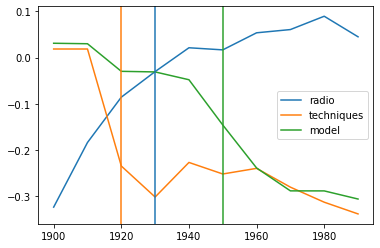

In [939]:
get_method_time_series(['radio', 'techniques', 'model'], method4_ts)

mirror 1930
admission 1930
host 1930


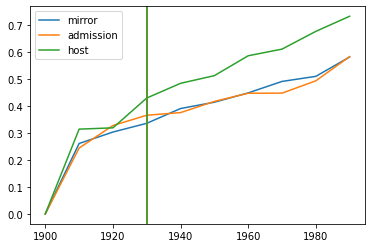

In [940]:
get_method_time_series(['mirror', 'admission', 'host'], method1_ts)

storm 1930
tail 1930
treaty 1930


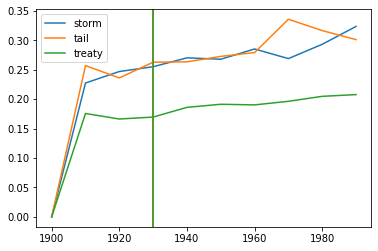

In [941]:
get_method_time_series(['storm', 'tail', 'treaty'], method2_ts)

divisions 1960
commissioners 1940
certificate 1950


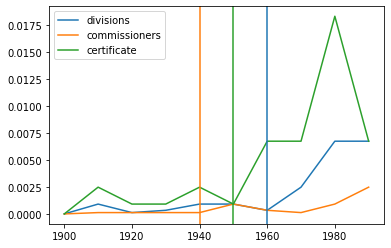

In [942]:
get_method_time_series(['divisions', 'commissioners', 'certificate'], method3_ts)

divisions 1930
commissioners 1920
certificate 1930


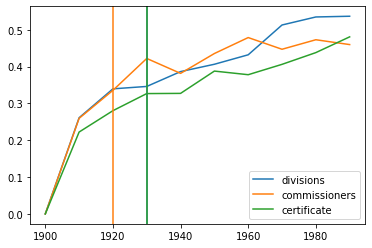

In [943]:
get_method_time_series(['divisions', 'commissioners', 'certificate'], method1_ts)